# CNN MODEL TO PREDICT HEALTH OF COW

#### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

#### Loading the data

In [8]:
df = pd.read_excel('Finaldata.xlsx')

#### Preprocessing of the data

In [9]:
df['Condition'] = df['Condition'].replace('Healthy', 1)
df['Condition'] = df['Condition'].replace('Not Healthy', 0)
X = df.drop(['Condition', 'time'], axis=1)
y = df['Condition']


#### Splitting the data into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#### Defining the CNN model

In [11]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Compiling the model

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#### Train the model

In [15]:
epochs = 50
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32,
                    callbacks=[EarlyStopping(patience=3)])


Epoch 1/50
22/22 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.9186 - val_loss: 0.2414 - val_accuracy: 0.9033
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9271 - val_loss: 0.2323 - val_accuracy: 0.9133
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9357 - val_loss: 0.2264 - val_accuracy: 0.9100
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9186 - val_loss: 0.2213 - val_accuracy: 0.9133
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.9157 - val_loss: 0.2154 - val_accuracy: 0.9300
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9200 - val_loss: 0.2195 - val_accuracy: 0.9167
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9186 - val_loss: 0.2751 - val_accuracy: 0.8767
Epoch 8/50
22/22 [==

#### Evaluating the model

In [16]:

y_pred_probs = model.predict(X_test)
y_pred = np.round(y_pred_probs).flatten().astype(int)
cnn_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", cnn_acc)

10/10 [==============================] - 0s 1ms/step
Accuracy: 0.93


#### Plotting the error over time

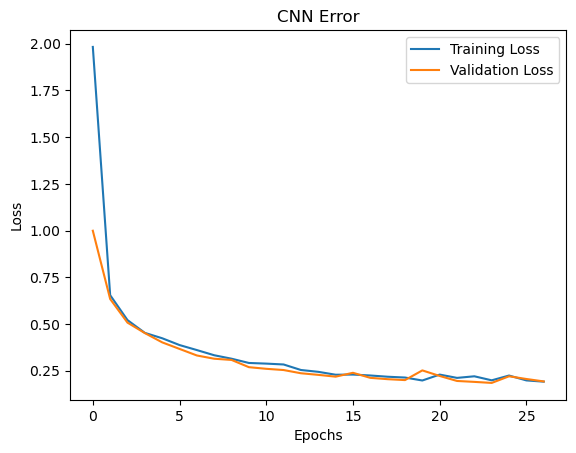

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing our model

In [ ]:
import numpy as np

input_data = np.array([[84, 47, 22.69782519, 37.91468594, 27.647046],
                      [56, 35, 67.21726468, 39.36215313, 30.34192818],
                      [81, 27, 76.37841651, 38.24689714, 37.0611],
                      [81, 26, 58.15401845, 39.42933382, 37.50479242],
                      [48, 30, 68.51330954, 37.93718252, 33.855696],
                      [65, 45, 63.04909213, 38.46855599, 33.88761641],
                      [88, 47, 55.89092663, 38.07286229, 24.87647242],
                      [85, 29, 35.40760642, 38.36660592, 37.95852433],
                      [46, 45, 48.99062459, 39.13010002, 35.84968941]])

count_1 = 0
count_0 = 0

for i in range(len(input_data)):
    timestep_input = input_data[i]
    prediction = model.predict(timestep_input.reshape(1, -1))
    predicted_class = np.round(prediction).flatten().astype(int)[0]

    if predicted_class == 1:
        count_1 += 1
    else:
        count_0 += 1

# Determine the maximum occurrence and return the corresponding value
if count_1 > count_0:
    result = 'Healthy'
else:
    result = 'Unhealthy'

print("Prediction:", result)


1/1 [==============================] - 0s 20ms/step
Prediction: Unhealthy
